In [22]:
import importlib
import model.trainer
import torch
import data.VCTK
importlib.reload(model.trainer)
importlib.reload(data.VCTK)

<module 'data.VCTK' from '/home/azureuser/dom/Project/data/VCTK.py'>

In [23]:
trainer = model.trainer.Trainer(
    device=torch.device("cuda"),
    checkpoint=300435,
    load_from_checkpoint=True
)

Using default model
Using default vocoder
Loading models from checkpoint 300435
Models loaded


In [24]:
dataset = model.trainer.get_dataset()

In [25]:
entry = dataset[0]

In [26]:
pred = trainer.train_step(entry, eval=True)

In [32]:
spectros, wavs = entry[2], entry[1]
spectros_pred, wavs_pred = pred
spectros_pred, wavs_pred = spectros_pred.to("cpu").detach(), wavs_pred.to("cpu").detach()

print(spectros.shape, spectros_pred.shape)
print(wavs.shape, wavs_pred.shape)

torch.Size([2, 80, 129]) torch.Size([2, 80, 129])
torch.Size([2, 25600]) torch.Size([2, 25600])


IndexError: index 2 is out of bounds for dimension 0 with size 2

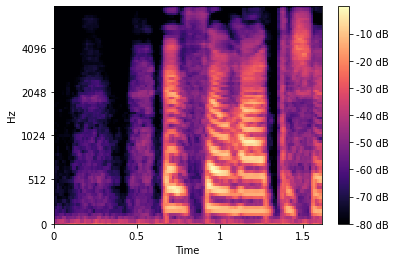

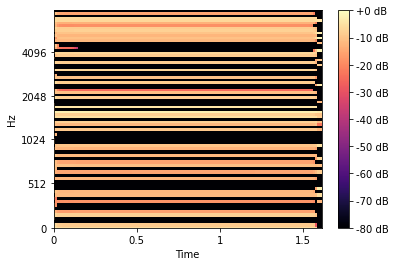

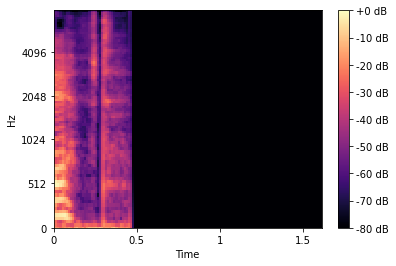

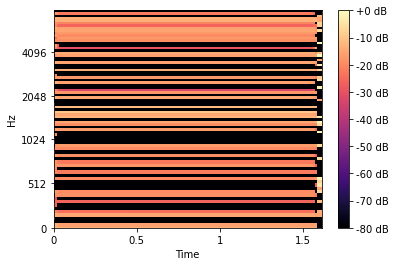

In [34]:
%matplotlib inline
dataset.show_spectros([spectros[0], spectros_pred[0]])
dataset.show_spectros([spectros[1], spectros_pred[1]])

In [45]:
print(wavs.shape, wavs_pred.shape)
wavs_stitched = wavs.view(1,-1)[0]
wavs_pred_stitched = wavs_pred.view(1,-1)[0]
print(wavs_stitched.shape, wavs_pred_stitched.shape)

torch.Size([2, 25600]) torch.Size([2, 25600])
torch.Size([51200]) torch.Size([51200])


In [46]:
import soundfile as sf
import pathlib
pathlib.Path("out").mkdir(exist_ok=True)

sf.write(file=f"out/b.wav", data=wavs_stitched.numpy(), samplerate=16000)
sf.write(file=f"out/b_pred.wav", data=wavs_pred_stitched.numpy(), samplerate=16000)

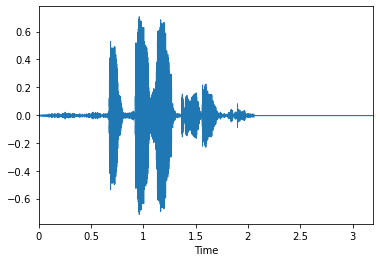

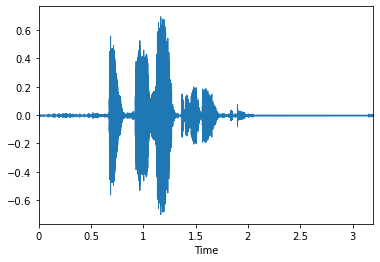

In [47]:
dataset.show_audios([wavs_stitched, wavs_pred_stitched])